In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oktayrdeki/heart-disease")

print("Path to dataset files:", path)

Path to dataset files: /home/threevc/.cache/kagglehub/datasets/oktayrdeki/heart-disease/versions/1


In [4]:
#df = pd.read_csv("./data/heart_disease.csv")

# Display first few rows
#print(df.head())


In [5]:
# All imports needed
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# import pandas as pd
def load_data(file_path: str):
    """
    Returns a DataFrame object of the csv file passed in.

    :param file_path: String of the file path to load in

    :return: A DataFrame object of the csv data
    """
    assert(isinstance(file_path, str)), "File path must be a valid path"
    # file_path = "./data/heart_disease.csv"
    df = pd.read_csv(file_path)
    return df

In [5]:
def get_data_info(data_frame):
    """
    View the structure of the data frame

    :param data_frame: The data frame to get the structure of
    """
    assert(isinstance(data_frame, pd.DataFrame)), "The input must be DataFrame object"
    print("Summary of Dataset:")
    data_frame.info()
    print("Get missing count")
    data_frame.isnull().sum() 

In [6]:
def get_num_rows(data_frame):
    """
    Get number of rows of the data frame

    :param data_frame: The data frame to get the number of rows
    """
    assert(isinstance(data_frame, pd.DataFrame)), "The input must be DataFrame object"
    return data_frame.shape[0]

In [7]:
def classify_non_numerical_columns(data_frame):
    """
    Classification model that predicts the output of non-numerical
    data in the data frame for missing entries.

    :param data_Frame: The data_frame.

    :return: A new data frame with all of the classified columns.
    """
    assert(isinstance(data_frame, pd.DataFrame)), "The input must be DataFrame object"
    non_numeric_cols = data_frame.select_dtypes(exclude=['number']).columns
    for col in non_numeric_cols:
        label_encoder = LabelEncoder()
        data_frame[col] = label_encoder.fit_transform(data_frame[col])
    return data_frame

In [8]:
df = load_data("./data/heart_disease.csv")
print(classify_non_numerical_columns(df))

       Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  \
0     56.0       1           153.0              155.0                0   
1     69.0       0           146.0              286.0                0   
2     46.0       1           126.0              216.0                1   
3     32.0       0           122.0              293.0                0   
4     60.0       1           166.0              242.0                1   
...    ...     ...             ...                ...              ...   
9995  25.0       0           136.0              243.0                2   
9996  38.0       1           172.0              154.0                2   
9997  73.0       1           152.0              201.0                0   
9998  23.0       1           142.0              299.0                1   
9999  38.0       0           128.0              193.0                2   

      Smoking  Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0           1                 

In [9]:
get_num_rows(df)

10000

In [10]:
def clean_data(data_frame):
    """ 
    Clean the data up from any missing values using KNN Imputer on
    numerical columns and Simple Imputer on non-numerical columns.
    Produces a cleaned data frame without missing entries. 

    :param data_frame: The data frame to clean up

    :return: The cleaned data frame
    """
    assert(isinstance(data_frame, pd.DataFrame)), "The input must be DataFrame object"

    # KNNImputer only works on numerical data
    # Apply to numerical columns with missing values
    numerical_cols = data_frame.select_dtypes(include=['number']).columns
    knn_imputer = KNNImputer(n_neighbors=5)
    data_frame[numerical_cols] = knn_imputer.fit_transform(data_frame[numerical_cols])

    # Apply SimpleImputer for non-numerical columns
    non_numerical_cols = data_frame.select_dtypes(exclude=['number']).columns
    mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    data_frame[non_numerical_cols] = mode_imputer.fit_transform(data_frame[non_numerical_cols])

    # TODO: Create a classifier pipeline for the non-numerical columns
    return data_frame

In [11]:
def main():
    """
    Main function to run complete data pipeline. Includes cleaning data,
    visualization, predictor.
    """
    df = load_data("./data/heart_disease.csv")
    print(f"Before cleaning: {get_num_rows(df)}")

    df_cleaned = clean_data(df)
    print(f"After cleaning: {get_num_rows(df_cleaned)}")

    duplicate_counts = df_cleaned.duplicated().sum()
    print(f"Duplicate rows: {duplicate_counts}")
main()

Before cleaning: 10000
After cleaning: 10000
Duplicate rows: 0


--------------------------------
# My changes

In [ ]:
import os
# All imports needed
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.impute import SimpleImputer
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import sampler
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt


from functools import wraps
import torch.nn.init as init
import torchvision.transforms as T
from sklearn.metrics import precision_score, recall_score, f1_score


import time 



if 'threevc' in os.getcwd():
    os.chdir('/home/threevc/ucsd/ece143/project/heart-disease-analysis')
print(os.getcwd())

/home/threevc/ucsd/ece143/project/heart-disease-analysis


In [3]:
print(os.listdir())

# os.listdir('./data')

['.git', 'README.md', 'best_confusion_matri.png', 'dependencies', 'notebook_with_models.ipynb', '.gitignore', 'heart-disease-analysis', 'data', 'notebook.ipynb']


In [4]:
df = pd.read_csv('./data/cleaned_heart_disease_majority.csv')
print(df.head(1))

    Age Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0   Male           153.0              155.0            High     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                120.8  12.969246   

   Homocysteine Level  Heart Disease Status  
0            12.38725                    No  

[1 rows x 21 columns]


In [5]:
# print((df['Gender']==1).sum()) ## 2 is anomaly
# print((df['Sugar Consumption']==3).sum()) ## 3 is anomaly
# print((df['Stress Level']==3).sum()) ## 3 is anomaly
# print((df['Alcohol Consumption']==3).sum()) ## No anomaly
# print((df['Low HDL Cholesterol']==2).sum()) ## 2 is the  anomaly
# print((df['High LDL Cholesterol']==2).sum()) ## 2 is the  anomaly
# print((df['High Blood Pressure']==2).sum()) ## 2 is the  anomaly
# print((df['Diabetes']==2).sum()) ## 2 is the  anomaly
# print((df['Family Heart Disease']==2).sum()) ## 2 is the  anomaly
# print((df['Smoking']==2).sum()) ## 2 is the  anomaly
# print((df['Family Heart Disease']==2).sum()) ## 2 is the  anomaly
# print((df['High Blood Pressure']==2).sum()) ## 2 is the  anomaly
# print((df['Diabetes']==2).sum()) ## 2 is the  anomaly
# print((df['Exercise Habits']==3).sum()) ## 3 is the  anomal

for column in df.columns:
    print(column, df[column].unique())

Age [56.  69.  46.  32.  60.  25.  78.  38.  75.  36.  40.  28.  41.  70.
 53.  57.  20.  39.  19.  61.  47.  55.  77.  50.  29.  42.  66.  44.
 76.  80.  59.  45.  33.  79.  64.  68.  72.  74.  54.  24.  26.  35.
 21.  31.  67.  43.  37.  52.  34.  23.  71.  51.  27.  48.  65.  62.
 58.  18.  22.  30.  49.  73.  63.  55.8 46.4 56.6 51.6 44.4 47.8 50.6
 57.4 58.8 61.8 52.4 38.8 40.2 52.2 59.4 61.6 44.6 48.2 65.4 45.4 41.2
 64.4 63.6 53.2 68.2]
Gender ['Male' 'Female']
Blood Pressure [153.  146.  126.  122.  166.  152.  121.  161.  135.  144.  179.  134.
 143.  150.  133.  173.  125.  136.  137.  139.  170.  159.  158.  171.
 151.  163.  128.  165.  129.  168.  155.  142.  127.  132.  176.  141.
 160.  154.  164.  138.  149.  178.  140.  147.  154.2 175.  162.  157.
 174.  123.  145.  124.  148.  169.  172.  167.  131.  120.  177.  130.
 180.  156.  154.6 144.8 158.6 150.4 146.4 163.8 139.4 161.4 155.6 149.4
 167.2 146.8 148.8]
Cholesterol Level [155.  286.  216.  293.  242.  257.  175.

In [6]:
class_columns = {'Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'High LDL Cholesterol', 'Low HDL Cholesterol'}
label_columns = {'Heart Disease Status'}
continuous_columns = set(df.columns) - label_columns - class_columns
df.columns, continuous_columns, label_columns, class_columns

(Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
        'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
        'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
        'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
        'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
        'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
       dtype='object'),
 {'Age',
  'Alcohol Consumption',
  'BMI',
  'Blood Pressure',
  'CRP Level',
  'Cholesterol Level',
  'Fasting Blood Sugar',
  'Homocysteine Level',
  'Sleep Hours',
  'Stress Level',
  'Sugar Consumption',
  'Triglyceride Level'},
 {'Heart Disease Status'},
 {'Diabetes',
  'Exercise Habits',
  'Family Heart Disease',
  'Gender',
  'High Blood Pressure',
  'High LDL Cholesterol',
  'Low HDL Cholesterol',
  'Smoking'})

In [7]:
from sklearn.impute import SimpleImputer




label_encoders = {}
for col in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for future use

X = df.drop(columns=label_columns)  # Replace with actual target column
y = df[list(label_columns)]
scaler = StandardScaler()
X.iloc[:, :] = scaler.fit_transform(X)

from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

imputer = SimpleImputer(strategy="mean")  # You can use "median" or "most_frequent"
X_train = imputer.fit_transform(X_train)
X_valid = imputer.transform(X_valid)
X_test = imputer.transform(X_test)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
dtrain = xgb.DMatrix(X_train_balanced, label=y_train_balanced)
# dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)



/tmp/ipykernel_743130/428382528.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.99560964 -1.00440972  0.99560964 ...  0.99560964  0.99560964
 -1.00440972]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :] = scaler.fit_transform(X)
/tmp/ipykernel_743130/428382528.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.21117317 -1.21117317  0.00792413 ... -1.21117317  0.00792413
  1.22702144]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :] = scaler.fit_transform(X)
/tmp/ipykernel_743130/428382528.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.97082539 -1.03005134 -1.03005134 ...  0.97082539  0.97082539
  0.97082539]' has dtype incompatible with int64

In [8]:
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',  # Evaluation metric for binary classification
    'max_depth': 5,  # Maximum depth of trees
    'eta': 0.1,  # Learning rate
    'subsample': 0.2,  # Fraction of data used per tree
    'colsample_bytree': 0.8,  # Fraction of features used per tree
    'random_state': 42
}

evals = [(dtrain, 'train'), (dvalid, 'valid')]

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,  # Stops if validation loss doesn't improve
    verbose_eval=50
)

[0]	train-logloss:0.67630	valid-logloss:0.68205
[50]	train-logloss:0.38668	valid-logloss:0.53412
[100]	train-logloss:0.32080	valid-logloss:0.52465
[141]	train-logloss:0.28803	valid-logloss:0.52670


In [9]:
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary values
print((y_pred == 0).sum())
print((y_test == 1).sum())
# Print Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1472
Heart Disease Status    300
dtype: int64
Accuracy: 0.7866666666666666
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1200
           1       0.14      0.01      0.02       300

    accuracy                           0.79      1500
   macro avg       0.47      0.50      0.45      1500
weighted avg       0.67      0.79      0.71      1500



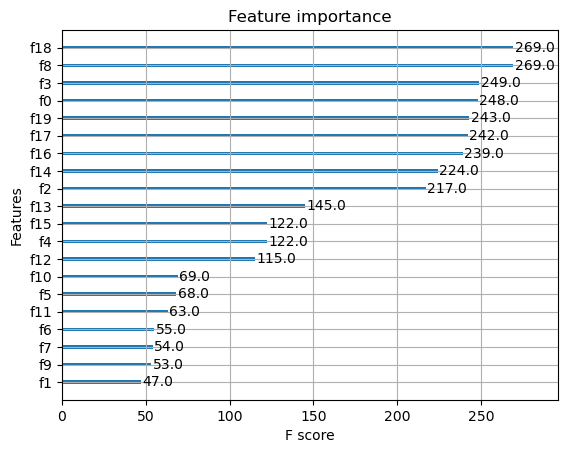

In [10]:
# import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

In [ ]:
(y==1).sum()
y.count(), (y==1).sum()
(y==0).count()
(y==1).sum()
y

(Heart Disease Status    10000
 dtype: int64,
 Heart Disease Status    2000
 dtype: int64)

,Heart Disease Status
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,1
9998,1


---------------------------------
# My Neural Network and SVM models

In [ ]:
df = pd.read_csv('data/cleaned_heart_disease_majority.csv')
categorical_columns = {'Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'High LDL Cholesterol', 'Low HDL Cholesterol'}
label_columns = {'Heart Disease Status'}
numerical_columns = set(df.columns) - label_columns - categorical_columns

In [ ]:
USE_GPU = True
num_class = 2
dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)
print(torch.cuda.is_available())

In [ ]:
class HeartDiseaseDataset(Dataset):
    """
    Custom PyTorch Dataset for heart disease data.
    
    Args:
        df (pd.DataFrame): DataFrame containing features and labels.
    """
    def __init__(self, df):
        # Convert 'Heart Disease Status' to numeric if it is not
        le = LabelEncoder()
        df['Heart Disease Status'] = le.fit_transform(df['Heart Disease Status'])
        self.labels = torch.tensor(pd.to_numeric(df['Heart Disease Status'], errors='coerce').values, dtype=torch.float32)
        
        # Separate features from the target column
        features = df.drop(columns=['Heart Disease Status'])
        
        # Handle categorical columns (assuming categorical columns are of type 'object' or 'category')
        categorical_columns = features.select_dtypes(include=['object', 'category']).columns
        label_encoders = {}
        
        # Apply label encoding to categorical features
        for col in categorical_columns:
            le = LabelEncoder()
            features[col] = le.fit_transform(features[col])
            label_encoders[col] = le
        
        # Convert the DataFrame features into a torch tensor
        self.features = torch.tensor(features.values, dtype=torch.float32)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


# Create Dataset and DataLoader
dataset = HeartDiseaseDataset(df)
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(df.drop(columns=['Heart Disease Status']), 
                                                    df['Heart Disease Status'], 
                                                    test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a DataLoader for batching
train_df = X_train.copy()
train_df['Heart Disease Status'] = y_train
valid_df = X_valid.copy()
valid_df['Heart Disease Status'] = y_valid
test_df = X_test.copy()
test_df['Heart Disease Status'] = y_test

# Create Dataset objects
train_dataset = HeartDiseaseDataset(train_df)
valid_dataset = HeartDiseaseDataset(valid_df)
test_dataset = HeartDiseaseDataset(test_df)

# Create DataLoaders for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [24]:

def get_predictions(loader, model, device, dtype = torch.float32):
    model.to(device)
    all_preds = []
    all_labels = []
    
    model.eval()  # Set model to evaluation mode
    score_array = []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            score_array.append(scores.cpu().numpy())

            _, preds = scores.max(1)  # Get predicted class
            all_preds.extend(preds.cpu().numpy())  # Store predictions
            all_labels.extend(y.cpu().numpy())  # Store true labels
    scores = np.array(score_array)
    print(scores[:20], all_preds[:20])
    return np.array(all_preds), np.array(all_labels), scores

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(cm, cmap="Blues")
    
    # Add color bar
    fig.colorbar(cax)
    
    # Add labels and title
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    
    # Rotate the tick labels for better visibility
    plt.xticks(rotation=45)
    
    # Label the axes
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title('Confusion Matrix')
    
    # Annotate each cell with the numeric value
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')
    
    plt.show()

In [25]:

def init_kaiming_normal(m):
    if isinstance(m, nn.Linear):  # Apply to all Linear layers
        init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        if m.bias is not None:
            init.zeros_(m.bias)  # Initialize biases to 0




def timeit(func):
    """Decorator to measure execution time of a function."""
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)  # Call the actual function
        end_time = time.time()
        print(f"Training time: {end_time - start_time:.1f} seconds")
        return result
    return wrapper


def validation_accuracy(loader, model):
    model.to(device)
    all_preds, all_labels, scores = get_predictions(loader, model, device)
    acc = (all_preds==all_labels).shape[0]/all_labels.shape[0]
    # model.to(device)
    # num_correct = 0
    # num_samples = 0
    # model.eval()  # set model to evaluation mode
    # score_array = []
    # with torch.no_grad():
    #     for x, y in loader:
    #         x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
    #         y = y.to(device=device, dtype=torch.long)
    #         scores = model(x)
    #         score_array.append(scores)
    #         _, preds = scores.max(1)
    #         num_correct += (preds == y).sum()
    #         num_samples += preds.size(0)
    #     acc = float(num_correct) / num_samples
    # scores = np.array(score_array)
    return acc, scores

@timeit
def train(model, optimizer, epochs=200, class_weights = [300, 1200], print_every = 50, test_every = 50, scheduler = None, apply_kaiming_init = True):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: The accuracy of the model
    """
    if apply_kaiming_init:
        model.apply(init_kaiming_normal)
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    class_weights = torch.tensor(class_weights, dtype= torch.float32)
    class_weights = class_weights.to(device=device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    loss_list = []

    best_acc = 0
    best_model = model

    for e in range(epochs):
        total_loss = 0
        for t, (x, y) in enumerate(train_loader):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            # loss = F.cross_entropy(scores, y)
            loss = criterion(scores, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        loss_list.append(total_loss)
        
        if scheduler:
            scheduler.step()
        if e % test_every == 0:
            acc, scores = validation_accuracy(val_loader, model)
            if acc > best_acc:
                best_acc = acc
                best_model = model
        if e%print_every == 0:
        # print('\tEpoch %d, loss = %.4f' % (e, loss.item()))
            print('\tEpoch %d, loss = %.4f' % (e, total_loss))

    acc, scores = validation_accuracy(val_loader, model)
    if acc > best_acc:
        best_acc = acc
        best_model = model
    print(scores)


    return best_acc, best_model, loss_list

---------

In [13]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# from torch.utils.data import sampler
# from torch.utils.data import Dataset, DataLoader
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# import matplotlib.pyplot as plt
# import torchvision.datasets as dset
# import torchvision.transforms as T

# import pandas as pd 
# import numpy as np
# import time 
# import os 

# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, accuracy_score

# import torch
# from torch.utils.data import Dataset, DataLoader
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# from functools import wraps
# import torch.nn.init as init


In [14]:
df = pd.read_csv('data/cleaned_heart_disease_majority.csv')
for column in df.columns:
    print(column, df[column].dtype, df[column].unique())
df.dtypes

Age float64 [56.  69.  46.  32.  60.  25.  78.  38.  75.  36.  40.  28.  41.  70.
 53.  57.  20.  39.  19.  61.  47.  55.  77.  50.  29.  42.  66.  44.
 76.  80.  59.  45.  33.  79.  64.  68.  72.  74.  54.  24.  26.  35.
 21.  31.  67.  43.  37.  52.  34.  23.  71.  51.  27.  48.  65.  62.
 58.  18.  22.  30.  49.  73.  63.  55.8 46.4 56.6 51.6 44.4 47.8 50.6
 57.4 58.8 61.8 52.4 38.8 40.2 52.2 59.4 61.6 44.6 48.2 65.4 45.4 41.2
 64.4 63.6 53.2 68.2]
Gender object ['Male' 'Female']
Blood Pressure float64 [153.  146.  126.  122.  166.  152.  121.  161.  135.  144.  179.  134.
 143.  150.  133.  173.  125.  136.  137.  139.  170.  159.  158.  171.
 151.  163.  128.  165.  129.  168.  155.  142.  127.  132.  176.  141.
 160.  154.  164.  138.  149.  178.  140.  147.  154.2 175.  162.  157.
 174.  123.  145.  124.  148.  169.  172.  167.  131.  120.  177.  130.
 180.  156.  154.6 144.8 158.6 150.4 146.4 163.8 139.4 161.4 155.6 149.4
 167.2 146.8 148.8]
Cholesterol Level float64 [155.  286

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

In [15]:
categorical_columns = {'Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'High LDL Cholesterol', 'Low HDL Cholesterol'}
label_columns = {'Heart Disease Status'}
numerical_columns = set(df.columns) - label_columns - categorical_columns
df.columns, numerical_columns, label_columns, categorical_columns

(Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
        'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
        'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
        'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
        'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
        'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
       dtype='object'),
 {'Age',
  'Alcohol Consumption',
  'BMI',
  'Blood Pressure',
  'CRP Level',
  'Cholesterol Level',
  'Fasting Blood Sugar',
  'Homocysteine Level',
  'Sleep Hours',
  'Stress Level',
  'Sugar Consumption',
  'Triglyceride Level'},
 {'Heart Disease Status'},
 {'Diabetes',
  'Exercise Habits',
  'Family Heart Disease',
  'Gender',
  'High Blood Pressure',
  'High LDL Cholesterol',
  'Low HDL Cholesterol',
  'Smoking'})

In [16]:
USE_GPU = True
num_class = 2
dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)
print(torch.cuda.is_available())

using device: cuda
True


In [17]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

class HeartDiseaseDataset(Dataset):
    """
    Custom PyTorch Dataset for heart disease data.
    
    Args:
        df (pd.DataFrame): DataFrame containing features and labels.
    """
    def __init__(self, df):
        # Convert 'Heart Disease Status' to numeric if it is not
        le = LabelEncoder()
        df['Heart Disease Status'] = le.fit_transform(df['Heart Disease Status'])
        self.labels = torch.tensor(pd.to_numeric(df['Heart Disease Status'], errors='coerce').values, dtype=torch.float32)
        
        # Separate features from the target column
        features = df.drop(columns=['Heart Disease Status'])
        
        # Handle categorical columns (assuming categorical columns are of type 'object' or 'category')
        categorical_columns = features.select_dtypes(include=['object', 'category']).columns
        label_encoders = {}
        
        # Apply label encoding to categorical features
        for col in categorical_columns:
            le = LabelEncoder()
            features[col] = le.fit_transform(features[col])
            label_encoders[col] = le
        
        # Convert the DataFrame features into a torch tensor
        self.features = torch.tensor(features.values, dtype=torch.float32)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Example Usage:
# Load dataset
# df = pd.read_csv("heart_disease_data.csv")

# Create Dataset and DataLoader
dataset = HeartDiseaseDataset(df)
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(df.drop(columns=['Heart Disease Status']), 
                                                    df['Heart Disease Status'], 
                                                    test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a DataLoader for batching
train_df = X_train.copy()
train_df['Heart Disease Status'] = y_train
valid_df = X_valid.copy()
valid_df['Heart Disease Status'] = y_valid
test_df = X_test.copy()
test_df['Heart Disease Status'] = y_test

# Create Dataset objects
train_dataset = HeartDiseaseDataset(train_df)
valid_dataset = HeartDiseaseDataset(valid_df)
test_dataset = HeartDiseaseDataset(test_df)

# Create DataLoaders for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# # Iterate over the data
# for features, labels in dataloader:
#     print(features.shape, labels.shape)  # Print the shape of features and labels



In [ ]:

def get_predictions(loader, model, device, dtype = torch.float32):
    model.to(device)
    all_preds = []
    all_labels = []
    
    model.eval()  # Set model to evaluation mode
    score_array = []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            score_array.append(scores.cpu().numpy())

            _, preds = scores.max(1)  # Get predicted class
            all_preds.extend(preds.cpu().numpy())  # Store predictions
            all_labels.extend(y.cpu().numpy())  # Store true labels
    scores = np.array(score_array)
    return np.array(all_preds), np.array(all_labels), scores

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(cm, cmap="Blues")
    
    # Add color bar
    fig.colorbar(cax)
    
    # Add labels and title
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    
    # Rotate the tick labels for better visibility
    plt.xticks(rotation=45)
    
    # Label the axes
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title('Confusion Matrix')
    
    # Annotate each cell with the numeric value
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')
    
    plt.show()

In [18]:
# print(df.head(2))
# print(dataset.features[0:2])
# print(dataset.labels[:2])

In [ ]:
# # import seaborn as sns
# # import matplotlib.pyplot as plt
# # from sklearn.metrics import confusion_matrix, accuracy_score

# # import torch
# # from torch.utils.data import Dataset, DataLoader
# # import pandas as pd
# # from sklearn.preprocessing import LabelEncoder

# # from functools import wraps
# # import torch.nn.init as init


# # from torch.utils.data import DataLoader

# def get_predictions(loader, model, device, dtype = torch.float32):
#     model.to(device)
#     all_preds = []
#     all_labels = []
    
#     model.eval()  # Set model to evaluation mode
#     score_array = []
#     with torch.no_grad():
#         for x, y in loader:
#             x = x.to(device=device, dtype=dtype)
#             y = y.to(device=device, dtype=torch.long)
#             scores = model(x)
#             score_array.append(scores)

#             _, preds = scores.max(1)  # Get predicted class
#             all_preds.extend(preds.cpu().numpy())  # Store predictions
#             all_labels.extend(y.cpu().numpy())  # Store true labels
#     scores = np.array(score_array)
#     return np.array(all_preds), np.array(all_labels), score_array

# def plot_confusion_matrix(y_true, y_pred, class_names):
#     cm = confusion_matrix(y_true, y_pred)
    
#     fig, ax = plt.subplots(figsize=(6, 6))
#     cax = ax.matshow(cm, cmap="Blues")
    
#     # Add color bar
#     fig.colorbar(cax)
    
#     # Add labels and title
#     ax.set_xticks(np.arange(len(class_names)))
#     ax.set_yticks(np.arange(len(class_names)))
#     ax.set_xticklabels(class_names)
#     ax.set_yticklabels(class_names)
    
#     # Rotate the tick labels for better visibility
#     plt.xticks(rotation=45)
    
#     # Label the axes
#     ax.set_xlabel('Predicted Label')
#     ax.set_ylabel('True Label')
#     ax.set_title('Confusion Matrix')
    
#     # Annotate each cell with the numeric value
#     for i in range(len(class_names)):
#         for j in range(len(class_names)):
#             ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')
    
#     plt.show()

In [20]:
# from functools import wraps
# import torch.nn.init as init



def init_kaiming_normal(m):
    if isinstance(m, nn.Linear):  # Apply to all Linear layers
        init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        if m.bias is not None:
            init.zeros_(m.bias)  # Initialize biases to 0




def timeit(func):
    """Decorator to measure execution time of a function."""
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)  # Call the actual function
        end_time = time.time()
        print(f"Training time: {end_time - start_time:.1f} seconds")
        return result
    return wrapper


def validation_accuracy(loader, model):
    model.to(device)
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    score_array = []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            score_array.append(scores)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
    scores = np.array(score_array)
    return acc, scores

@timeit
def train(model, optimizer, epochs=200, class_weights = [300, 1200], print_every = 50, test_every = 50, scheduler = None, apply_kaiming_init = True):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: The accuracy of the model
    """
    if apply_kaiming_init:
        model.apply(init_kaiming_normal)
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    class_weights = torch.tensor(class_weights, dtype= torch.float32)
    class_weights = class_weights.to(device=device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    loss_list = []

    best_acc = 0
    best_model = model

    for e in range(epochs):
        total_loss = 0
        for t, (x, y) in enumerate(train_loader):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            # loss = F.cross_entropy(scores, y)
            loss = criterion(scores, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        loss_list.append(total_loss)
        
        if scheduler:
            scheduler.step()
        if e % test_every == 0:
            acc, scores = validation_accuracy(val_loader, model)
            if acc > best_acc:
                best_acc = acc
                best_model = model
        if e%print_every == 0:
        # print('\tEpoch %d, loss = %.4f' % (e, loss.item()))
            print('\tEpoch %d, loss = %.4f' % (e, total_loss))

    acc, scores = validation_accuracy(val_loader, model)
    if acc > best_acc:
        best_acc = acc
        best_model = model
    print(scores)


    return best_acc, best_model, loss_list

In [ ]:
best_acc = 0
best_model = None
num_epochs = 201
print_every = 50
lr = 5e-5
class_weights = [300,1200]
# from sklearn.metrics import precision_score, recall_score, f1_score



In [23]:
k_list = [16,32,64,96,128,160]
val_acc_list = []
loss_lists = {}
best_k = None

for k in k_list:
    print("######################################")
    print(f"k = {k}")
    model = nn.Sequential(nn.Linear(20, k),
                        nn.ReLU(),
                        nn.Linear(k, 2),
                        )
    optimizer = optim.Adam(model.parameters(), lr = lr)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = num_epochs)
    acc, model, loss_list= train(model, optimizer, num_epochs, class_weights, scheduler = scheduler)
    loss_lists[k] = loss_list
    if acc > best_acc:
        best_k = k
        best_acc = acc 
        best_model = model 
    print(f"k = {k}, acc = {acc*100:.2f}%")
    val_acc_list.append(acc)
    y_pred, y_true = get_predictions(val_loader, model, device)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    plot_confusion_matrix(y_true, y_pred, class_names=["No Heart Disease", "Heart Disease"])
    print("######################################")


plt.plot(k_list, val_acc_list)


######################################
k = 16


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

###############################
Non-linearity = ReLU
	Epoch 0, loss = 96521.1245
	Epoch 50, loss = 247.0386
	Epoch 100, loss = 199.0073
	Epoch 150, loss = 184.3993
	Epoch 200, loss = 181.4071
Training time: 56.9 seconds
Non-linearity = ReLU, acc = 80.80%
Precision: 0.1914
Recall: 0.4792
F1-Score: 0.2735


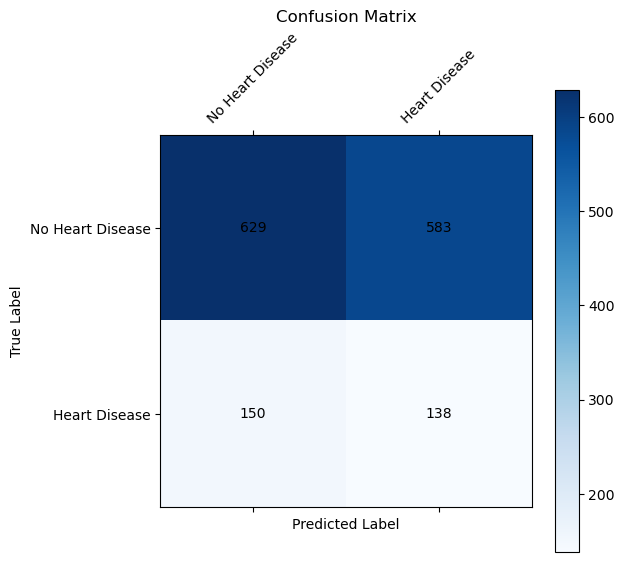

###############################
###############################
Non-linearity = Sigmoid
	Epoch 0, loss = 231.0047
	Epoch 50, loss = 159.0401
	Epoch 100, loss = 155.7141
	Epoch 150, loss = 155.0717
	Epoch 200, loss = 154.7399
Training time: 60.7 seconds
Non-linearity = Sigmoid, acc = 54.87%
Precision: 0.2003
Recall: 0.4618
F1-Score: 0.2794


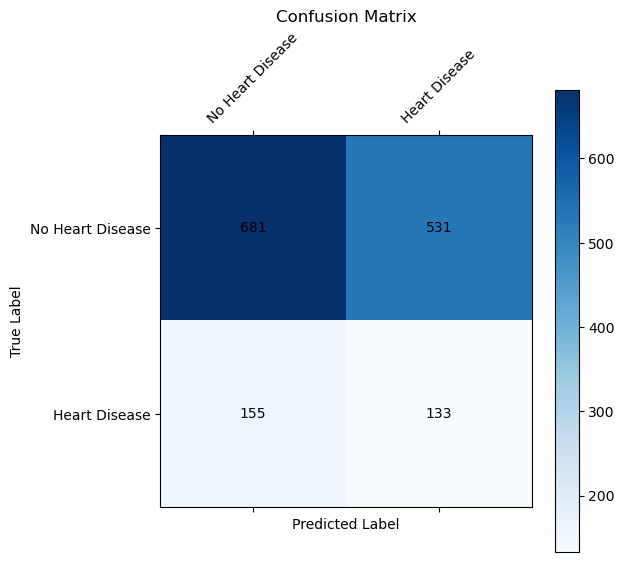

###############################
###############################
Non-linearity = Leaky ReLU
	Epoch 0, loss = 35343.9031
	Epoch 50, loss = 270.1405
	Epoch 100, loss = 204.1136
	Epoch 150, loss = 184.3422
	Epoch 200, loss = 180.0678
Training time: 61.3 seconds
Non-linearity = Leaky ReLU, acc = 74.07%
Precision: 0.1974
Recall: 0.5312
F1-Score: 0.2879


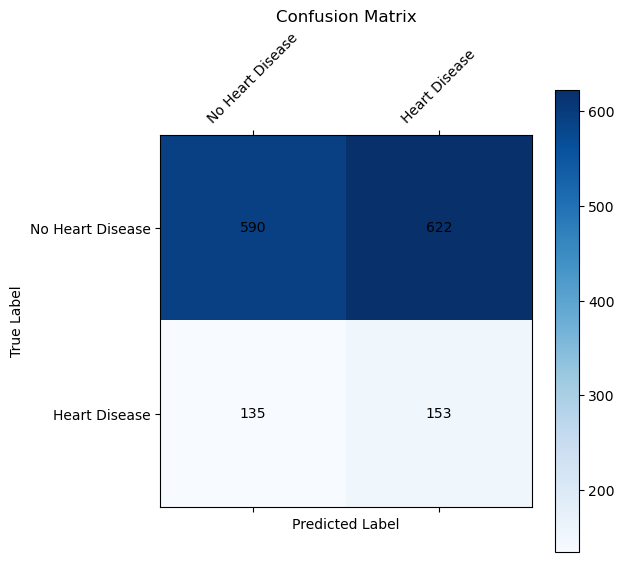

###############################
###############################
Non-linearity = Swish
	Epoch 0, loss = 11749.6129
	Epoch 50, loss = 192.9025
	Epoch 100, loss = 165.8212
	Epoch 150, loss = 158.0779
	Epoch 200, loss = 156.1241
Training time: 57.3 seconds
Non-linearity = Swish, acc = 79.47%
Precision: 0.1792
Recall: 0.3472
F1-Score: 0.2364


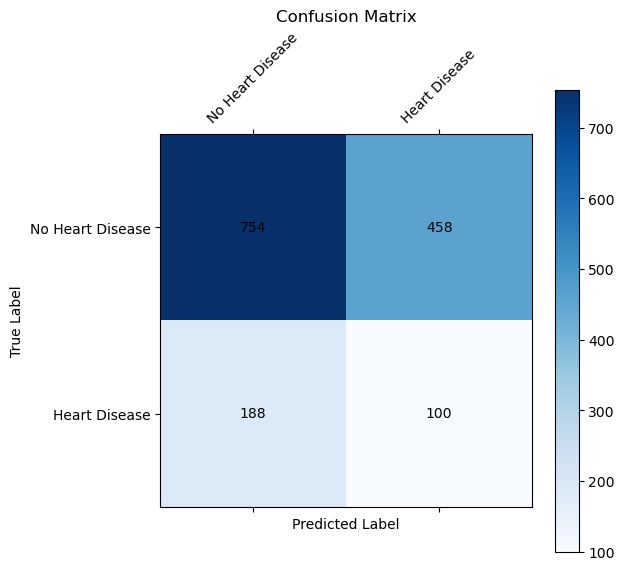

###############################


Text(0, 0.5, 'Accuracy')

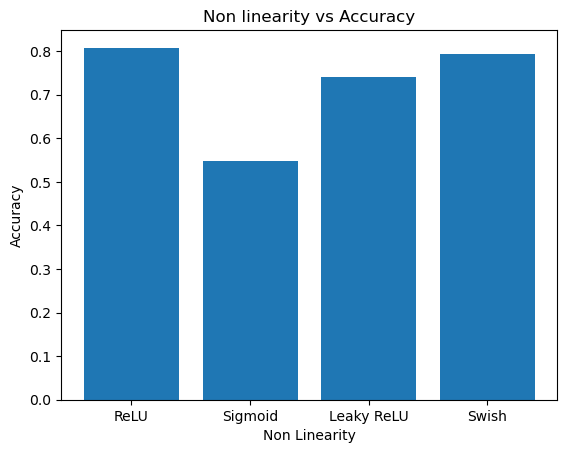

In [11]:
# k_list = [16,32,64,96,128, 160]
k = best_k = 64
non_linearity_list = [('ReLU',nn.ReLU), ('Sigmoid',nn.Sigmoid), ('Leaky ReLU',nn.LeakyReLU), ('Swish',nn.SiLU)]
val_acc_list = []
lr = 5e-5
best_nonlinearity = None
loss_lists = {}

for string, nl in non_linearity_list:
    print("###############################")
    print(f"Non-linearity = {string}")
    model = nn.Sequential(nn.Linear(20, k),
                        nl(),
                        nn.Linear(k, 2),
                        )
    optimizer = optim.Adam(model.parameters(), lr = lr)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
    acc, model, loss_list = train(model, optimizer, num_epochs, class_weights, scheduler = scheduler)
    loss_lists[string] = loss_list
    if acc > best_acc:
        best_acc = acc 
        best_model = model 
        best_nonlinearity = string
    print(f"Non-linearity = {string}, acc = {acc*100:.2f}%")
    val_acc_list.append(acc)
    y_pred, y_true = get_predictions(val_loader, model, device)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    plot_confusion_matrix(y_true, y_pred, class_names=["No Heart Disease", "Heart Disease"])
    print("###############################")

# plt.plot(non_linearity_list, val_acc_list)
plt.bar([string for string, _ in non_linearity_list], val_acc_list)
plt.title('Non linearity vs Accuracy')
plt.xlabel('Non Linearity')
plt.ylabel('Accuracy')
